In [1]:
#상위 폴더 load_data파일 불러오기 위해 경로 추가
import sys
sys.path.append('../')  # 상위 폴더(main_folder)의 경로를 추가

# 데이터 가져오기
from load_data import load_data

# 사용자 지정 함수 불러오기
from eval import get_Accuracy_tf

# 텐서플로
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as Layer

# 콜백
from timeit import default_timer as timer

In [2]:
# 랜덤시드 고정
tf.random.set_seed(42)

In [3]:
# MinMaxScaler - 0, StandardScaler - 1, , MaxAbsScaler - 2, RobustScaler - 3, Normalizer - 4
X_train0, X_val0, X_test0, y_train0, y_val0, y_test0, scaler0  = load_data(scaler=0)
X_train1, X_val1, X_test1, y_train1, y_val1, y_test1, scaler1  = load_data(scaler=1)
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2, scaler2  = load_data(scaler=2)
X_train3, X_val3, X_test3, y_train3, y_val3, y_test3, scaler3  = load_data(scaler=3)
X_train4, X_val4, X_test4, y_train4, y_val4, y_test4, scaler4  = load_data(scaler=4)

X_train1.shape, X_val1.shape, X_test2.shape, y_train2.shape, y_val2.shape, y_test2.shape, scaler2



((2672, 10), (669, 10), (836, 10), (2672,), (669,), (836,), MaxAbsScaler())

In [15]:

def get_model(nodes1 = 8, nodes2= 6, nodes3 = 4, drop_rate= 0.2, activation= 'relu'):
  # base 모델 만들기

  model = Sequential([Layer.Dense(12, input_shape=(len(X_train0.columns),))])
  model.add(Layer.Dense(nodes1, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes2, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(nodes3, activation = activation))
  model.add(Layer.BatchNormalization())
  model.add(Layer.Dropout(drop_rate))

  model.add(Layer.Dense(1, activation = activation))

  model.compile(optimizer = 'adam',
              loss='mean_squared_error',
              metrics = [get_Accuracy_tf])

  return model

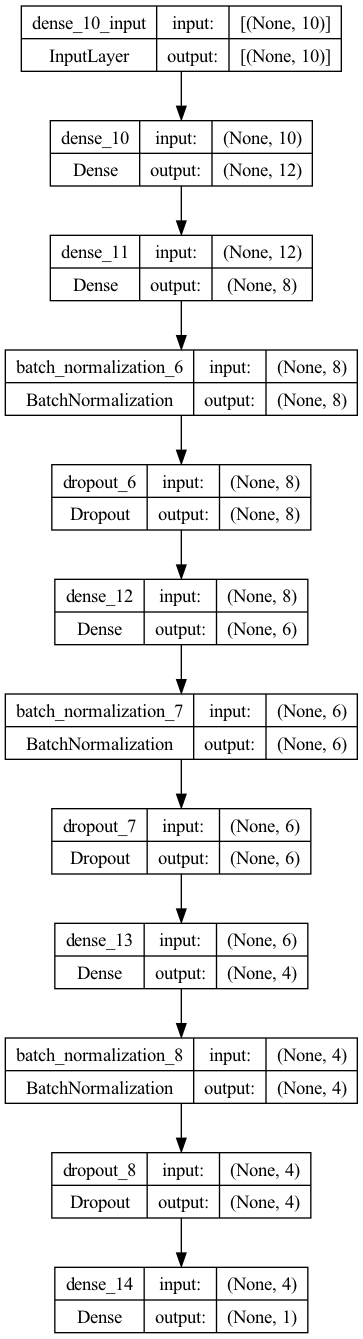

In [16]:
model = get_model()
keras.utils.plot_model(model, show_shapes=True)

In [18]:

# 학습 소요 시간 표시 콜백용 class 정의
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        print("Starting training")
        self.starttime = timer()

    def on_train_end(self, logs=None):
        print("End of training, took {} seconds".format(timer()-self.starttime))

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
          print("Epoch is {} and {} seconds passed".format(epoch, timer()-self.starttime))

In [19]:
check_path = 'model_weight.h5'

callback = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=50),
    tf.keras.callbacks.ModelCheckpoint(filepath=check_path, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=200, min_lr=0.001),
    TimingCallback()
]

In [20]:
history0 = model.fit(X_train0, y_train0, batch_size= 1024, epochs= 1000,  validation_data=(X_val0, y_val0), callbacks=callback,verbose = 0)
results0 = model.evaluate(X_test0, y_test0)

Starting training
Epoch is 0 and 0.529623124981299 seconds passed
Epoch is 10 and 0.7196710419375449 seconds passed
Epoch is 20 and 0.9195157089270651 seconds passed
Epoch is 30 and 1.12801279197447 seconds passed
Epoch is 40 and 1.3262478339020163 seconds passed
Epoch is 50 and 1.5184080840554088 seconds passed
Epoch is 60 and 1.7086694589816034 seconds passed
Epoch is 70 and 1.9021605839952826 seconds passed
Epoch is 80 and 2.0881018340587616 seconds passed
Epoch is 90 and 2.2779214589390904 seconds passed
Epoch is 100 and 2.456922249868512 seconds passed
Epoch is 110 and 2.6107763340696692 seconds passed
Epoch is 120 and 2.776740917004645 seconds passed
Epoch is 130 and 2.930849374970421 seconds passed
Epoch is 140 and 3.092883874895051 seconds passed
Epoch is 150 and 3.232077583903447 seconds passed
Epoch is 160 and 3.386712291976437 seconds passed
Epoch is 170 and 3.5390365419443697 seconds passed
Epoch is 180 and 3.702035958878696 seconds passed
Epoch is 190 and 3.842557084048167

In [21]:
history1 = model.fit(X_train1, y_train1, batch_size= 1024, epochs= 1000,  validation_data=(X_val1, y_val1), callbacks=callback,verbose = 0)
results1 = model.evaluate(X_test1, y_test1)

Starting training
Epoch is 0 and 0.03940541693009436 seconds passed
Epoch is 10 and 0.18703537480905652 seconds passed
Epoch is 20 and 0.32924170792102814 seconds passed
Epoch is 30 and 0.4724649579729885 seconds passed
Epoch is 40 and 0.6221687919460237 seconds passed
Epoch is 50 and 0.7683914578519762 seconds passed
Epoch is 60 and 0.9110379999037832 seconds passed
Epoch is 70 and 1.0560332499444485 seconds passed
Epoch is 80 and 1.2009606249630451 seconds passed
Epoch is 90 and 1.3434880829881877 seconds passed
Epoch is 100 and 1.490238499827683 seconds passed
End of training, took 1.5045642498880625 seconds
27/27 [==============================] - 0s 348us/step - loss: 6.1114 - get_Accuracy_tf: 0.7739


In [22]:
history2 = model.fit(X_train2, y_train2, batch_size= 1024, epochs= 1000,  validation_data=(X_val2, y_val2), callbacks=callback,verbose = 0)
results2 = model.evaluate(X_test2, y_test2)

Starting training
Epoch is 0 and 0.04035458294674754 seconds passed
Epoch is 10 and 0.1889580418355763 seconds passed
Epoch is 20 and 0.3282841248437762 seconds passed
Epoch is 30 and 0.47568191681057215 seconds passed
Epoch is 40 and 0.6174640418030322 seconds passed
Epoch is 50 and 0.758016541833058 seconds passed
Epoch is 60 and 0.8994399579241872 seconds passed
Epoch is 70 and 1.0443077918607742 seconds passed
Epoch is 80 and 1.1848637918010354 seconds passed
Epoch is 90 and 1.3238539998419583 seconds passed
Epoch is 100 and 1.466669957851991 seconds passed
Epoch is 110 and 1.607345666969195 seconds passed
Epoch is 120 and 1.7539572918321937 seconds passed
Epoch is 130 and 1.9045382919721305 seconds passed
Epoch is 140 and 2.046600582776591 seconds passed
Epoch is 150 and 2.1836028748657554 seconds passed
Epoch is 160 and 2.3325377078726888 seconds passed
Epoch is 170 and 2.4749943749047816 seconds passed
Epoch is 180 and 2.615721666952595 seconds passed
Epoch is 190 and 2.75990499

In [23]:
history3 = model.fit(X_train3, y_train3, batch_size= 1024, epochs= 1000,  validation_data=(X_val3, y_val3), callbacks=callback,verbose = 0)
results3 = model.evaluate(X_test3, y_test3)

Starting training
Epoch is 0 and 0.039788082940503955 seconds passed
Epoch is 10 and 0.19993533287197351 seconds passed
Epoch is 20 and 0.341474249958992 seconds passed
Epoch is 30 and 0.48759287502616644 seconds passed
Epoch is 40 and 0.6303214998915792 seconds passed
Epoch is 50 and 0.7738110409118235 seconds passed
Epoch is 60 and 0.9144125829916447 seconds passed
Epoch is 70 and 1.0651027499698102 seconds passed
Epoch is 80 and 1.217770375078544 seconds passed
Epoch is 90 and 1.371117499889806 seconds passed
Epoch is 100 and 1.5075702080503106 seconds passed
Epoch is 110 and 1.651644750032574 seconds passed
Epoch is 120 and 1.7914740410633385 seconds passed
Epoch is 130 and 1.9368099579587579 seconds passed
End of training, took 1.99221683293581 seconds
27/27 [==============================] - 0s 408us/step - loss: 7.1691 - get_Accuracy_tf: 0.7787


In [24]:
history4 = model.fit(X_train4, y_train4, batch_size= 1024, epochs= 1000,  validation_data=(X_val4, y_val4), callbacks=callback,verbose = 0)
results4 = model.evaluate(X_test4, y_test4)

Starting training
Epoch is 0 and 0.04256895883008838 seconds passed
Epoch is 10 and 0.1861532498151064 seconds passed
Epoch is 20 and 0.3310656249523163 seconds passed
Epoch is 30 and 0.46641858387738466 seconds passed
Epoch is 40 and 0.6042090838309377 seconds passed
Epoch is 50 and 0.7412809589877725 seconds passed
Epoch is 60 and 0.8808287498541176 seconds passed
Epoch is 70 and 1.0206845838110894 seconds passed
Epoch is 80 and 1.1609786248300225 seconds passed
End of training, took 1.229692708933726 seconds
27/27 [==============================] - 0s 383us/step - loss: 7.6195 - get_Accuracy_tf: 0.8209
